In [1]:
##Alrighty so this code is going to try to do timeseries of 14-days prior to each cluster for the metrics. 

In [2]:
#import packages
import datetime as dt
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
import scipy.stats
import pickle

In [3]:
#open files for split gph data and recombine, old root is ../2023ClusterCode/Pickles/

infile = open("../../New_ERAfiles/gph_NEW.p", 'rb')
gph = pickle.load(infile)
infile.close()

infile = open("../../New_ERAfiles/gph_time_NEW.p", 'rb')
gph_time = pickle.load(infile)
infile.close()

infile = open("../../New_ERAfiles/gph_lat_NEW.p", 'rb')
gph_lat = pickle.load(infile)
infile.close()

infile = open("../../New_ERAfiles/gph_lon_NEW.p", 'rb')
gph_lon = pickle.load(infile)
infile.close()

In [5]:
infile = open("UW_lat.p", 'rb')
unweighted_lat = pickle.load(infile)
infile.close()

infile = open("UW_lon.p", 'rb') 
unweighted_lon = pickle.load(infile)
infile.close()

infile = open("./ClusterLabels/ALL_GPHcluster_labels.p", 'rb') 
label = pickle.load(infile)
infile.close()

infile = open("./ClusterLabels/ALL_HOURLY_GPHcluster_labels.p", 'rb') 
label_H = pickle.load(infile)
infile.close()

In [6]:
infile = open("ao_vals.p", 'rb')
ao = pickle.load(infile)
infile.close()

infile = open("nao_vals.p", 'rb') 
nao = pickle.load(infile)
infile.close()

infile = open("pna_vals.p", 'rb') 
pna = pickle.load(infile)
infile.close()

In [7]:
#old root is ../../Ellipse_ERAI_data/
infile = open("../../New_EllipseVals/ephi10_NEW.p", 'rb')
ephi10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_ratio10_NEW.p", 'rb')
rat10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_size10_NEW.p", 'rb')
size10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_cenlat10_NEW.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_cenlon10_NEW.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("../../New_EllipseVals/ephi_wind10_NEW.p", 'rb')
wind10 = pickle.load(infile)
infile.close()

In [8]:
##going to start by reshaping .. can do this to look for daily elliptical values rather than in periods by 4. 

In [9]:
wind = np.reshape(wind10, (12160))
ephi = np.reshape(ephi10, (12160))
rat = np.reshape(rat10, (12160))
size = np.reshape(size10, (12160))
cenlt= np.reshape(cenlat10, (12160))
cenln= np.reshape(cenlon10, (12160))

In [10]:
#non-stacked
##creating DataArray for gph
gph = xr.DataArray(data= gph, 
                       dims = ["time","lat","lon"],
                       coords = dict(
                           time = gph_time,
                           lat = gph_lat,
                           lon = gph_lon)
                      )
gph_D = gph.groupby('time.date').mean()

gph

<xarray.DataArray (time: 12160, lat: 128, lon: 512)>
array([[[30955.646, 30957.584, 30959.674, ..., 30953.146, 30953.3  ,
         30954.115],
        [30956.615, 30958.756, 30960.947, ..., 30953.3  , 30953.709,
         30954.78 ],
        [30957.584, 30959.775, 30962.02 , ..., 30953.402, 30954.115,
         30955.492],
        ...,
        [29367.795, 29367.387, 29366.928, ..., 29369.018, 29368.611,
         29368.203],
        [29356.883, 29356.578, 29356.322, ..., 29357.648, 29357.393,
         29357.139],
        [29347.91 , 29347.809, 29347.654, ..., 29348.268, 29348.113,
         29348.012]],

       [[30927.26 , 30926.953, 30926.24 , ..., 30926.393, 30927.209,
         30927.463],
        [30926.648, 30926.342, 30925.781, ..., 30926.086, 30926.7  ,
         30926.852],
        [30925.576, 30925.168, 30924.812, ..., 30925.781, 30925.883,
         30925.781],
...
        [29473.12 , 29473.68 , 29474.24 , ..., 29471.588, 29472.098,
         29472.61 ],
        [29501.16 , 29501.467, 29501.824, ..., 29500.191, 29500.498,
         29500.803],
        [29530.63 , 29530.783, 29530.936, ..., 29530.223, 29530.324,
         29530.477]],

       [[30907.75 , 30908.31 , 30909.28 , ..., 30905.354, 30906.578,
         30907.24 ],
        [30905.1  , 30905.762, 30906.73 , ..., 30902.703, 30903.621,
         30904.334],
        [30902.295, 30903.06 , 30903.824, ..., 30900.459, 30900.918,
         30901.428],
        ...,
        [29456.133, 29456.643, 29457.154, ..., 29454.654, 29455.113,
         29455.623],
        [29484.482, 29484.787, 29485.094, ..., 29483.564, 29483.87 ,
         29484.176],
        [29514.46 , 29514.562, 29514.717, ..., 29514.053, 29514.156,
         29514.309]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1999-11-01 ... 2019-04-01T18:00:00
  * lat      (lat) float32 1.0 0.9998 0.9995 0.9991 ... 0.03373 0.02152 0.009375
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3

In [11]:
##create arrays for metrics, daily ... can use first and `.values` to view ALL time steps. 
wind = xr.DataArray(data= wind,dims = ["time"], coords = dict(time = gph_time))
wind_D2 = wind.groupby('time.date').mean()
#wind_D2 = np.nan_to_num(wind_D, nan = -999)

ephi = xr.DataArray(data= ephi,dims = ["time"], coords = dict(time = gph_time))
ephi_D2 = ephi.groupby('time.date').mean()
#ephi_D2 = np.nan_to_num(ephi_D, nan = -999)

rat = xr.DataArray(data= rat,dims = ["time"], coords = dict(time = gph_time))
rat_D2 = rat.groupby('time.date').mean()
#rat_D2 = np.nan_to_num(rat_D, nan = -999)

size = xr.DataArray(data= size,dims = ["time"], coords = dict(time = gph_time))
size_D2 = size.groupby('time.date').mean()
#size_D2 = np.nan_to_num(size_D, nan = -999)

cenlt = xr.DataArray(data= cenlt,dims = ["time"], coords = dict(time = gph_time))
cenlt_D2 = cenlt.groupby('time.date').mean()
#cenlt_D2 = np.nan_to_num(cenlt_D, nan = -999)

cenln = xr.DataArray(data= cenln,dims = ["time"], coords = dict(time = gph_time))
cenln_D2 = cenln.groupby('time.date').mean()
#cenln_D2 = np.nan_to_num(cenln_D, nan = -999)

In [12]:
#Reshape Ellipse metrics
wind_D2 = wind_D2.values.reshape(20,152)
ephi_D2 = ephi_D2.values.reshape(20,152)
rat_D2 = rat_D2.values.reshape(20,152)
size_D2 = size_D2.values.reshape(20,152)
cenlt_D2 = cenlt_D2.values.reshape(20,152)
cenln_D2 = cenln_D2.values.reshape(20,152)

In [13]:
ao = ao.reshape(20,152)
nao = nao.reshape(20,152)
pna = pna.reshape(20,152)

In [11]:
##same thing but for non-daily
wind_all = wind.values.reshape(20,608)
ephi_all = ephi.values.reshape(20,608)
rat_all = rat.values.reshape(20,608)
size_all = size.values.reshape(20,608)
cenlt_all = cenlt.values.reshape(20,608)
cenln_all = cenln.values.reshape(20,608)

## HERE TO "BELOW" FOR DAILY VALUES

In [14]:
gph_D_array = gph_D["date"].to_numpy()
cluster_dates = gph_D_array.reshape(20,152)

In [15]:
label = label.reshape(20,152)

In [16]:
days = []
years = []

for i in range(len(cluster_dates[0,:])):
    test = cluster_dates[0,i]
    test = test.strftime("%m-%d")
    days.append(test)

for i in range(len(cluster_dates[:,0])):
    test = cluster_dates[i,0]
    test = test.strftime("%Y")
    years.append(test)

In [17]:
#set empty list of metrics across clusters
w1 = []
e1 = []
r1 = []
s1 = []
ct1 = []
cn1 = []

w2 = []
e2 = []
r2 = []
s2 = []
ct2 = []
cn2 = []

w3 = []
e3 = []
r3 = []
s3 = []
ct3 = []
cn3 = []

w4 = []
e4 = []
r4 = []
s4 = []
ct4 = []
cn4 = []

w5 = []
e5 = []
r5 = []
s5 = []
ct5 = []
cn5 = []

In [18]:
AO1 = []
NAO1 = []
PNA1 = []

AO2 = []
NAO2 = []
PNA2 = []

AO3 = []
NAO3 = []
PNA3 = []

AO4 = []
NAO4 = []
PNA4 = []

AO5 = []
NAO5 = []
PNA5 = []

In [19]:
for i in range(len(label[:,0])):
    for j in range(14,152,1):
        if label[i,j] == 0:
            if label[i,j-14:j-3].all() == 0: 
                continue
            else: 
                #print(label[i,j])
                w1.append(wind_D2[i,j-14:j])
                e1.append(ephi_D2[i,j-14:j])
                s1.append(size_D2[i,j-14:j])
                r1.append(rat_D2[i,j-14:j])
                ct1.append(cenlt_D2[i,j-14:j])
                cn1.append(cenln_D2[i,j-14:j])
                
                AO1.append(ao[i,j-14:j])
                NAO1.append(nao[i,j-14:j])
                PNA1.append(pna[i,j-14:j])
         
        if label[i,j] == 1:
            if label[i,j-14:j-3].all() == 1:
                continue
            else: 
                w2.append(wind_D2[i,j-14:j])
                e2.append(ephi_D2[i,j-14:j])
                s2.append(size_D2[i,j-14:j])
                r2.append(rat_D2[i,j-14:j])
                ct2.append(cenlt_D2[i,j-14:j])
                cn2.append(cenln_D2[i,j-14:j])
                
                AO2.append(ao[i,j-14:j])
                NAO2.append(nao[i,j-14:j])
                PNA2.append(pna[i,j-14:j])
            
        if label[i,j] == 2:
            if label[i,j-14:j-3].all() == 2:
                continue
            else: 
                w3.append(wind_D2[i,j-14:j])
                e3.append(ephi_D2[i,j-14:j])
                s3.append(size_D2[i,j-14:j])
                r3.append(rat_D2[i,j-14:j])
                ct3.append(cenlt_D2[i,j-14:j])
                cn3.append(cenln_D2[i,j-14:j])
                
                AO3.append(ao[i,j-14:j])
                NAO3.append(nao[i,j-14:j])
                PNA3.append(pna[i,j-14:j])
            
        if label[i,j] == 3:
            if label[i,j-14:j-3].all() == 3:
                continue
            else: 
                w4.append(wind_D2[i,j-14:j])
                e4.append(ephi_D2[i,j-14:j])
                s4.append(size_D2[i,j-14:j])
                r4.append(rat_D2[i,j-14:j])
                ct4.append(cenlt_D2[i,j-14:j])
                cn4.append(cenln_D2[i,j-14:j])
                
                AO4.append(ao[i,j-14:j])
                NAO4.append(nao[i,j-14:j])
                PNA4.append(pna[i,j-14:j])
        
        if label[i,j] == 4:
            if label[i,j-14:j-3].all() == 4:
                continue
            else: 
                w5.append(wind_D2[i,j-14:j])
                e5.append(ephi_D2[i,j-14:j])
                s5.append(size_D2[i,j-14:j])
                r5.append(rat_D2[i,j-14:j])
                ct5.append(cenlt_D2[i,j-14:j])
                cn5.append(cenln_D2[i,j-14:j])
                
                AO5.append(ao[i,j-14:j])
                NAO5.append(nao[i,j-14:j])
                PNA5.append(pna[i,j-14:j])

In [20]:
wind_clus = np.empty((5,14))
ephi_clus = np.empty((5,14))
size_clus = np.empty((5,14))
rat_clus = np.empty((5,14))
cenlat_clus = np.empty((5,14))
cenlon_clus = np.empty((5,14))

In [21]:
wind_clus[0,:] = np.nanmean(np.array(w1), axis = 0)
wind_clus[1,:] = np.nanmean(np.array(w2), axis = 0)
wind_clus[2,:] = np.nanmean(np.array(w3), axis = 0)
wind_clus[3,:] = np.nanmean(np.array(w4), axis = 0)
wind_clus[4,:] = np.nanmean(np.array(w5), axis = 0)

ephi_clus[0,:] = np.nanmean(np.array(e1), axis = 0)
ephi_clus[1,:] = np.nanmean(np.array(e2), axis = 0)
ephi_clus[2,:] = np.nanmean(np.array(e3), axis = 0)
ephi_clus[3,:] = np.nanmean(np.array(e4), axis = 0)
ephi_clus[4,:] = np.nanmean(np.array(e5), axis = 0)

size_clus[0,:] = np.nanmean(np.array(s1), axis = 0)
size_clus[1,:] = np.nanmean(np.array(s2), axis = 0)
size_clus[2,:] = np.nanmean(np.array(s3), axis = 0)
size_clus[3,:] = np.nanmean(np.array(s4), axis = 0)
size_clus[4,:] = np.nanmean(np.array(s5), axis = 0)

rat_clus[0,:] = np.nanmean(np.array(r1), axis = 0)
rat_clus[1,:] = np.nanmean(np.array(r2), axis = 0)
rat_clus[2,:] = np.nanmean(np.array(r3), axis = 0)
rat_clus[3,:] = np.nanmean(np.array(r4), axis = 0)
rat_clus[4,:] = np.nanmean(np.array(r5), axis = 0)

cenlat_clus[0,:] = np.nanmean(np.array(ct1), axis = 0)
cenlat_clus[1,:] = np.nanmean(np.array(ct2), axis = 0)
cenlat_clus[2,:] = np.nanmean(np.array(ct3), axis = 0)
cenlat_clus[3,:] = np.nanmean(np.array(ct4), axis = 0)
cenlat_clus[4,:] = np.nanmean(np.array(ct5), axis = 0)

cenlon_clus[0,:] = np.nanmean(np.array(cn1), axis = 0)
cenlon_clus[1,:] = np.nanmean(np.array(cn2), axis = 0)
cenlon_clus[2,:] = np.nanmean(np.array(cn3), axis = 0)
cenlon_clus[3,:] = np.nanmean(np.array(cn4), axis = 0)
cenlon_clus[4,:] = np.nanmean(np.array(cn5), axis = 0)

## BELOW HERE RUN FOR HOURLY VALUES

In [12]:
gph_H_array = gph["time"].to_numpy()
cluster_hours = gph_H_array.reshape(20,608)

In [13]:
label_H = label_H.reshape(20,608)

In [14]:
#set empty list of metrics across clusters
w1 = []
e1 = []
r1 = []
s1 = []
ct1 = []
cn1 = []

w2 = []
e2 = []
r2 = []
s2 = []
ct2 = []
cn2 = []

w3 = []
e3 = []
r3 = []
s3 = []
ct3 = []
cn3 = []

w4 = []
e4 = []
r4 = []
s4 = []
ct4 = []
cn4 = []

w5 = []
e5 = []
r5 = []
s5 = []
ct5 = []
cn5 = []

In [15]:
for i in range(len(label_H[:,0])):
    for j in range(56,608,1):
        if label_H[i,j] == 0:
            if label_H[i,j-56:j-12].all() == 0:
                continue
            else: 
                #print(label[i,j])
                w1.append(wind_all[i,j-56:j])
                e1.append(ephi_all[i,j-56:j])
                s1.append(size_all[i,j-56:j])
                r1.append(rat_all[i,j-56:j])
                ct1.append(cenlt_all[i,j-56:j])
                cn1.append(cenln_all[i,j-56:j])
            
        if label_H[i,j] == 1:
            if label_H[i,j-56:j-12].all() == 1:
                continue
            else: 
                w2.append(wind_all[i,j-56:j])
                e2.append(ephi_all[i,j-56:j])
                s2.append(size_all[i,j-56:j])
                r2.append(rat_all[i,j-56:j])
                ct2.append(cenlt_all[i,j-56:j])
                cn2.append(cenln_all[i,j-56:j])
            
        if label_H[i,j] == 2:
            if label_H[i,j-56:j-12].all() == 2:
                continue
            else: 
                w3.append(wind_all[i,j-56:j])
                e3.append(ephi_all[i,j-56:j])
                s3.append(size_all[i,j-56:j])
                r3.append(rat_all[i,j-56:j])
                ct3.append(cenlt_all[i,j-56:j])
                cn3.append(cenln_all[i,j-56:j])
            
        if label_H[i,j] == 3:
            if label_H[i,j-56:j-12].all() == 3:
                continue
            else: 
                w4.append(wind_all[i,j-56:j])
                e4.append(ephi_all[i,j-56:j])
                s4.append(size_all[i,j-56:j])
                r4.append(rat_all[i,j-56:j])
                ct4.append(cenlt_all[i,j-56:j])
                cn4.append(cenln_all[i,j-56:j])
        
        if label_H[i,j] == 4:
            if label_H[i,j-56:j-12].all() == 4:
                continue
            else: 
                w5.append(wind_all[i,j-56:j])
                e5.append(ephi_all[i,j-56:j])
                s5.append(size_all[i,j-56:j])
                r5.append(rat_all[i,j-56:j])
                ct5.append(cenlt_all[i,j-56:j])
                cn5.append(cenln_all[i,j-56:j])

In [16]:
wind_clus = np.empty((5,56))
ephi_clus = np.empty((5,56))
size_clus = np.empty((5,56))
rat_clus = np.empty((5,56))
cenlat_clus = np.empty((5,56))
cenlon_clus = np.empty((5,56))

In [21]:
wind_clus[0,:] = np.nanmedian(np.array(w1), axis = 0)
wind_clus[1,:] = np.nanmedian(np.array(w2), axis = 0)
wind_clus[2,:] = np.nanmedian(np.array(w3), axis = 0)
wind_clus[3,:] = np.nanmedian(np.array(w4), axis = 0)
wind_clus[4,:] = np.nanmedian(np.array(w5), axis = 0)

ephi_clus[0,:] = np.nanmedian(np.array(e1), axis = 0)
ephi_clus[1,:] = np.nanmedian(np.array(e2), axis = 0)
ephi_clus[2,:] = np.nanmedian(np.array(e3), axis = 0)
ephi_clus[3,:] = np.nanmedian(np.array(e4), axis = 0)
ephi_clus[4,:] = np.nanmedian(np.array(e5), axis = 0)

size_clus[0,:] = np.nanmedian(np.array(s1), axis = 0)
size_clus[1,:] = np.nanmedian(np.array(s2), axis = 0)
size_clus[2,:] = np.nanmedian(np.array(s3), axis = 0)
size_clus[3,:] = np.nanmedian(np.array(s4), axis = 0)
size_clus[4,:] = np.nanmedian(np.array(s5), axis = 0)

rat_clus[0,:] = np.nanmedian(np.array(r1), axis = 0)
rat_clus[1,:] = np.nanmedian(np.array(r2), axis = 0)
rat_clus[2,:] = np.nanmedian(np.array(r3), axis = 0)
rat_clus[3,:] = np.nanmedian(np.array(r4), axis = 0)
rat_clus[4,:] = np.nanmedian(np.array(r5), axis = 0)

cenlat_clus[0,:] = np.nanmedian(np.array(ct1), axis = 0)
cenlat_clus[1,:] = np.nanmedian(np.array(ct2), axis = 0)
cenlat_clus[2,:] = np.nanmedian(np.array(ct3), axis = 0)
cenlat_clus[3,:] = np.nanmedian(np.array(ct4), axis = 0)
cenlat_clus[4,:] = np.nanmedian(np.array(ct5), axis = 0)

cenlon_clus[0,:] = np.nanmedian(np.array(cn1), axis = 0)
cenlon_clus[1,:] = np.nanmedian(np.array(cn2), axis = 0)
cenlon_clus[2,:] = np.nanmedian(np.array(cn3), axis = 0)
cenlon_clus[3,:] = np.nanmedian(np.array(cn4), axis = 0)
cenlon_clus[4,:] = np.nanmedian(np.array(cn5), axis = 0)

### Here down plots whatever is filling w1,w2,w3,etc. arrays.

In [22]:
forecast_days = [i for i in range(-14,0,1)]
#forecast_days = [i for i in range(-56,0,1)]

In [23]:
colors = ['red','orange','green','cyan','blue','violet','magenta']

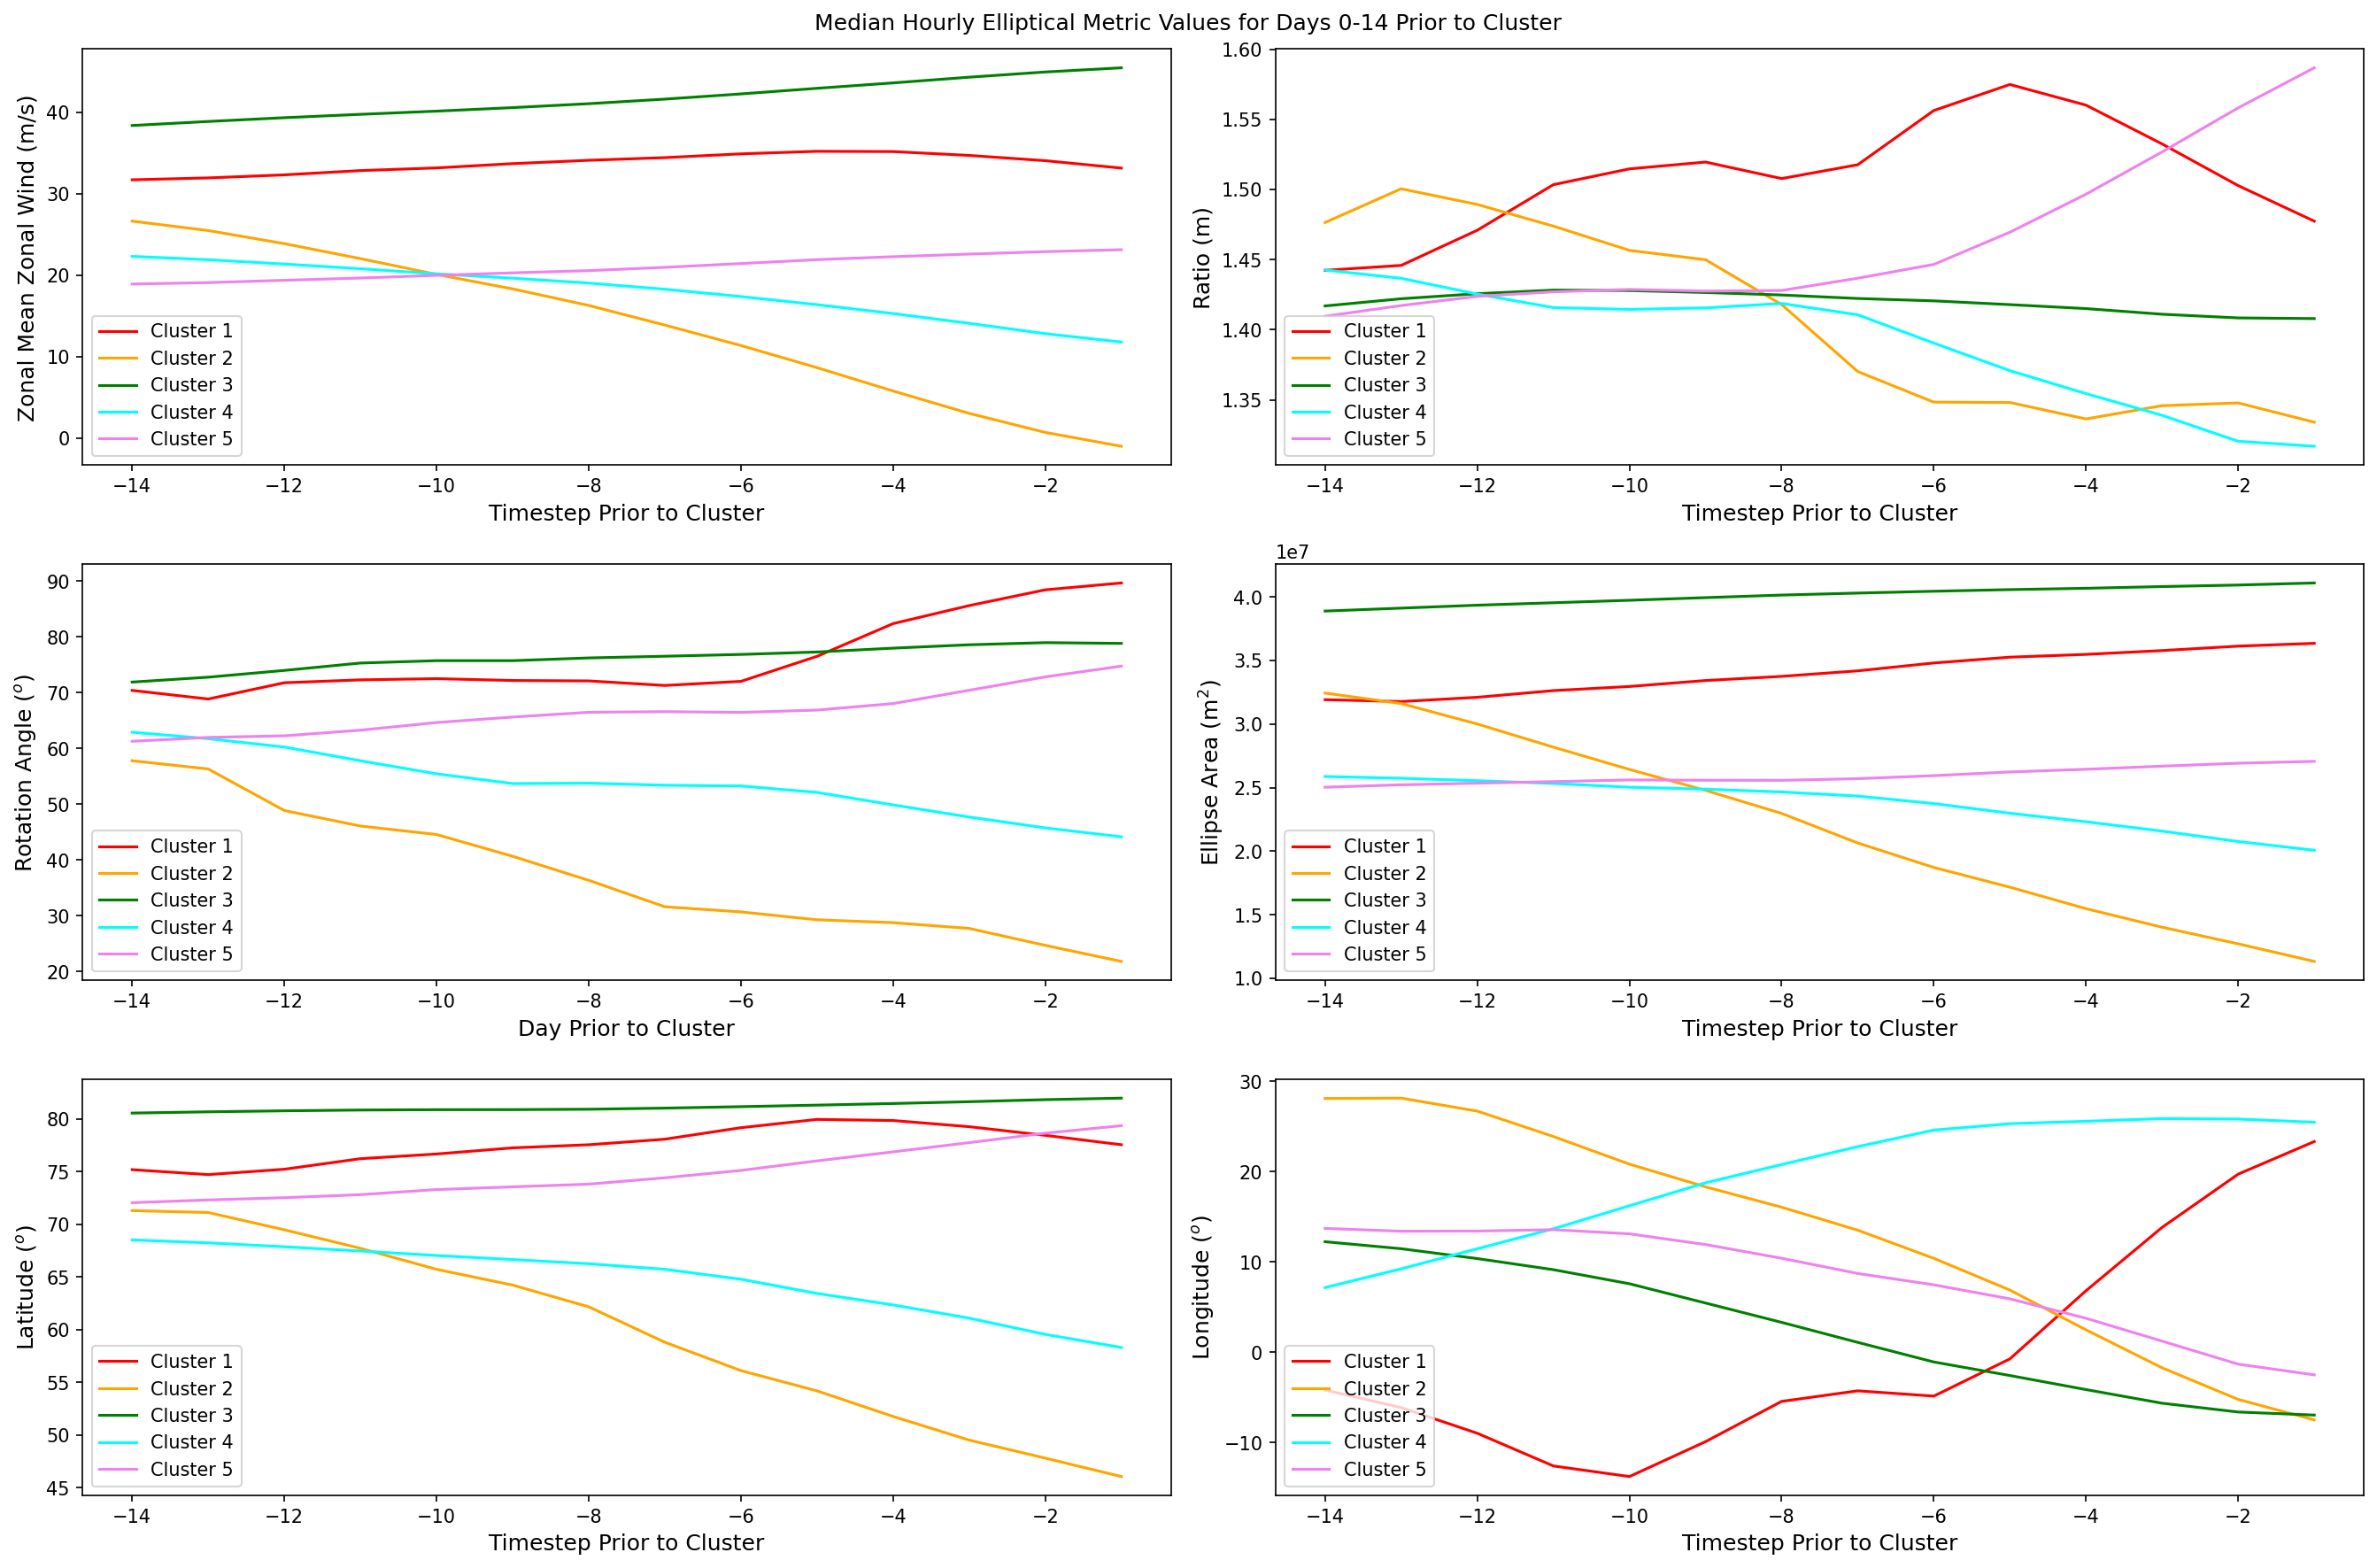

In [24]:
%matplotlib inline
##big plots
myLocator = mticker.MultipleLocator(4)

fig = plt.figure(figsize=(18,12),dpi=150)
fig.suptitle("Median Hourly Elliptical Metric Values for Days 0-14 Prior to Cluster") 

#loop through each member
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
ax6 = plt.subplot(3,2,6)

for m in range(0,5,1):
    #print(u_data_mem)
    # Specify how our lines should look
    #colorR = (m+2)/ 15.
    ax1.plot(forecast_days, wind_clus[m,:], color=colors[m], label='Cluster '+str(m+1))
    ax1.set_xlabel('Timestep Prior to Cluster',fontsize = 12)
    ax1.set_ylabel('Zonal Mean Zonal Wind (m/s)',fontsize = 12)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.legend(loc='lower left',fontsize='medium');
    
    ax2.plot(forecast_days, rat_clus[m,:], color=colors[m], label='Cluster '+str(m+1))
    ax2.set_xlabel('Timestep Prior to Cluster', fontsize = 12)
    ax2.set_ylabel('Ratio (m)', fontsize = 12)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.legend(loc='lower left',fontsize='medium');
    
    ax3.plot(forecast_days, ephi_clus[m,:], color=colors[m], label='Cluster '+str(m+1))
    ax3.set_xlabel('Day Prior to Cluster', fontsize = 12)
    ax3.set_ylabel('Rotation Angle ($^o$)', fontsize = 12)
    ax3.tick_params(axis='both', which='major', labelsize=10)
    ax3.legend(loc='lower left',fontsize='medium');
    
    ax4.plot(forecast_days, size_clus[m,:], color=colors[m], label='Cluster '+str(m+1))
    ax4.set_xlabel('Timestep Prior to Cluster', fontsize = 12)
    ax4.set_ylabel('Ellipse Area (m$^2$)', fontsize = 12)
    ax4.tick_params(axis='both', which='major', labelsize=10)
    ax4.legend(loc='lower left',fontsize='medium');
    
    ax5.plot(forecast_days, cenlat_clus[m,:], color=colors[m], label='Cluster '+str(m+1))
    ax5.set_xlabel('Timestep Prior to Cluster', fontsize = 12)
    ax5.set_ylabel('Latitude ($^o$)', fontsize = 12)
    ax5.tick_params(axis='both', which='major', labelsize=10)
    ax5.legend(loc='lower left',fontsize='medium');
    
    ax6.plot(forecast_days, cenlon_clus[m,:], color=colors[m], label='Cluster '+str(m+1))
    ax6.set_xlabel('Timestep Prior to Cluster', fontsize = 12)
    ax6.set_ylabel('Longitude ($^o$)', fontsize = 12)
    ax6.tick_params(axis='both', which='major', labelsize=10)
    ax6.legend(loc='lower left',fontsize='medium');

plt.tight_layout()
plt.show()
#fig.savefig("Median_HOURLY_DaysToClus.png")


May be quasi useless to view longitude or any of the negative skewing metrics in this way because of averaging. 

In [26]:
print("Cluster 1 Median Climate Indicies:")
print("AO: ", np.nanmedian(AO1))
print("NAO: ", np.nanmedian(NAO1))
print("PNA: ", np.nanmedian(PNA1))

print("Cluster 2 Median Climate Indicies:")
print("AO: ", np.nanmedian(AO2))
print("NAO: ", np.nanmedian(NAO2))
print("PNA: ", np.nanmedian(PNA2))

print("Cluster 3 Median Climate Indicies:")
print("AO: ", np.nanmedian(AO3))
print("NAO: ", np.nanmedian(NAO3))
print("PNA: ", np.nanmedian(PNA3))

print("Cluster 4 Median Climate Indicies:")
print("AO: ", np.nanmedian(AO4))
print("NAO: ", np.nanmedian(NAO4))
print("PNA: ", np.nanmedian(PNA4))

print("Cluster 5 Median Climate Indicies:")
print("AO: ", np.nanmedian(AO5))
print("NAO: ", np.nanmedian(NAO5))
print("PNA: ", np.nanmedian(PNA5))


Cluster 1 Median Climate Indicies:
AO:  -0.063293867
NAO:  0.201000005
PNA:  0.364235848
Cluster 2 Median Climate Indicies:
AO:  -0.250656784
NAO:  0.382157952
PNA:  0.504464626
Cluster 3 Median Climate Indicies:
AO:  0.761892736
NAO:  0.406545103
PNA:  -0.0811093
Cluster 4 Median Climate Indicies:
AO:  -0.157717332
NAO:  0.30644713349999997
PNA:  0.444961041
Cluster 5 Median Climate Indicies:
AO:  0.043804277
NAO:  0.291916877
PNA:  0.050000001
